#### Discrete Simulation HW1
#### Problem 2
Authored: Austin Jetrin Maddison 6481268

In [217]:
from my_settings import *

In [182]:
np.random.seed(27)

In [203]:
def run_sim(n: int, N: int) -> float: 
    
    # bob's random choices
    rand_vals = np.random.ranf(N)
    xs = np.zeros((N, n))  # N sets of n values
    groundtruth = np.zeros(N, dtype=int)
    mask_1 = rand_vals > 0.5

    # alice pressing the buttons n times
    xs[mask_1] = np.random.randint(1, 99+1, size=(mask_1.sum(), n))
    groundtruth[mask_1] = 1
    xs[~mask_1] = np.random.randint(2, 100+1, size=((~mask_1).sum(), n))
    groundtruth[~mask_1] = 2

    # Case 1: Check for exclusive outputs (presence of 1 or 100)
    found_1 = np.any(xs == 1, axis=1)
    found_100 = np.any(xs == 100, axis=1)

    correct_case_1 = np.zeros(N, dtype=int)
    correct_case_1[found_1] = 1
    correct_case_1[found_100] = 2
    
    correct_case_1 = correct_case_1 == groundtruth 

    # Case 2: For remaining cases, compute mean distances
    button_1_mean = (1 + 99) / 2
    button_2_mean = (2 + 100) / 2

    remaining_cases = (~found_1) & (~found_100)
    x_means = np.mean(xs[remaining_cases], axis=1)
    dists_1 = np.abs(x_means - button_1_mean)
    dists_2 = np.abs(x_means - button_2_mean)
    predictions_case_2 = (dists_1 > dists_2).astype(int) + 1

    correct_case_2 = groundtruth[remaining_cases] == predictions_case_2

    correct = np.zeros(N, dtype=bool)
    correct[remaining_cases] = correct_case_2
    correct[~remaining_cases] = correct_case_1[~remaining_cases]

    return np.mean(correct)

Find $n$ that $p_n \ge 0.99$ 

In [218]:
N = 400_000
run_sim_vec = np.vectorize(lambda x: run_sim(x, N))
ns = np.arange(500, dtype=int)
ps = run_sim_vec(ns)

In [238]:
n = np.argmin(np.abs((np.ones(np.shape(ns)) * 0.990) - ps))
intersection  = (n+1, ps[n+1].item())
print(f'n={intersection[0]} = {intersection[1]}')

n=385 = 0.9900675


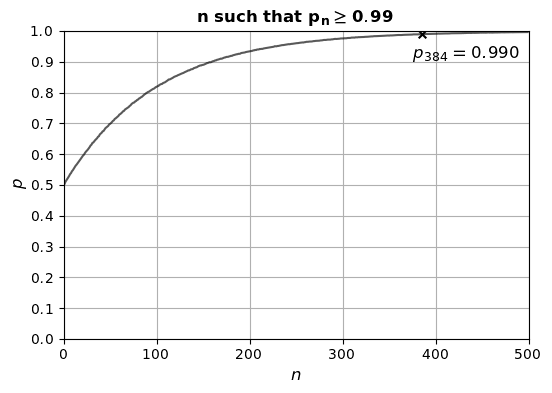

In [239]:
plt.figure(figsize=(6, 4))
plt.plot(ns, ps, 'k', alpha=0.65)
plt.grid()
plt.scatter(intersection[0], intersection[1], s=30, color='k', marker='x')
plt.annotate(f"$p_{{{n}}} = {{{intersection[1]:.3f}}} $",(intersection[0]-10, intersection[1]-0.08), fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1, dtype=float))
plt.xlim(0, 500)
plt.ylim(0.0, 1)
plt.title("$\\mathbf{ \\textbf{n such that }p_{n} \ge 0.99}$", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)
plt.savefig("tex/p2_1.svg")

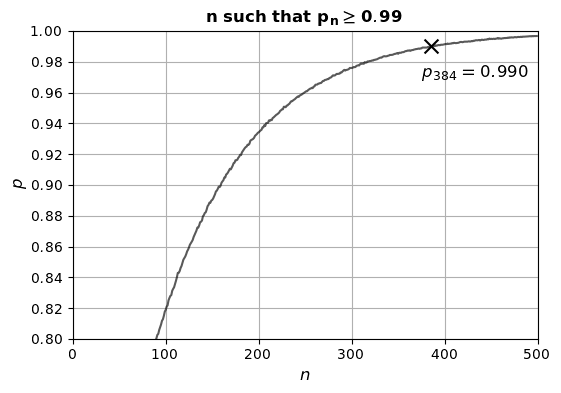

In [246]:
plt.figure(figsize=(6, 4))
plt.plot(ns, ps, 'k', alpha=0.65)
plt.grid()
plt.scatter(intersection[0], intersection[1], s=100, color='k', marker='x')
plt.annotate(f"$p_{{{n}}} = {{{intersection[1]:.3f}}} $",(intersection[0]-10, intersection[1]-0.02), fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.02, dtype=float))
plt.xlim(0, 500)
plt.ylim(0.8, 1.0)
plt.title("$\\mathbf{ \\textbf{n such that }p_{n} \ge 0.99}$", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)
plt.savefig("tex/p2_2.svg")